In [1]:
%cd ..
import utils 
import pandas as pd
import numpy as np

f:\ICEE\Fault detection\GearBox_Fault_detection-ICEE2024


In [2]:
datas = pd.read_csv(r".\model\ViT_L1_learning_rate=0.001_weight_decay=0.003_report.csv")
datas

,Unnamed: 0,model_name,mode,image_type,epoch,learning_rate,batch_size,batch_index,loss_batch,avg_train_loss_till_current_batch,avg_train_acc_till_current_batch,avg_val_loss_till_current_batch,avg_val_acc_till_current_batch
0,0,ViT_L1_learning_rate=0.001_weight_decay=0.003,train,original,1,0.001,8,1,0.702338,0.702338,0.375000,NaN,NaN
1,1,ViT_L1_learning_rate=0.001_weight_decay=0.003,train,original,1,0.001,8,2,0.700525,0.701432,0.437500,NaN,NaN
2,2,ViT_L1_learning_rate=0.001_weight_decay=0.003,train,original,1,0.001,8,3,0.697272,0.700045,0.458333,NaN,NaN
3,3,ViT_L1_learning_rate=0.001_weight_decay=0.003,train,original,1,0.001,8,4,0.694560,0.698674,0.437500,NaN,NaN
4,4,ViT_L1_learning_rate=0.001_weight_decay=0.003,train,original,1,0.001,8,5,0.672512,0.693441,0.500000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,ViT_L1_learning_rate=0.001_weight_decay=0.003,train,original,50,0.001,8,28,0.000369,0.000331,1.000000,NaN,NaN
1596,1596,ViT_L1_learning_rate=0.001_weight_decay=0.003,val,original,50,0.001,8,1,0.000390,NaN,NaN,0.000390,1.000000
1597,1597,ViT_L1_learning_rate=0.001_weight_decay=0.003,val,original,50,0.001,8,2,0.549660,NaN,NaN,0.275025,0.937500
1598,1598,ViT_L1_learning_rate=0.001_weight_decay=0.003,val,original,50,0.001,8,3,0.549595,NaN,NaN,0.366548,0.916667


In [3]:
train=datas.query('mode == "train"')#.query('batch_index == 53')
test=datas.query('mode == "val"')#.query('batch_index == 7')

In [4]:
def Preprocc(shortt,longg,):
    x_interp  = np.linspace(1, len(longg)+1, len(longg))
    y2_interp = np.interp(x_interp, list(range(1,len(shortt)+1,1)), shortt)

    return y2_interp


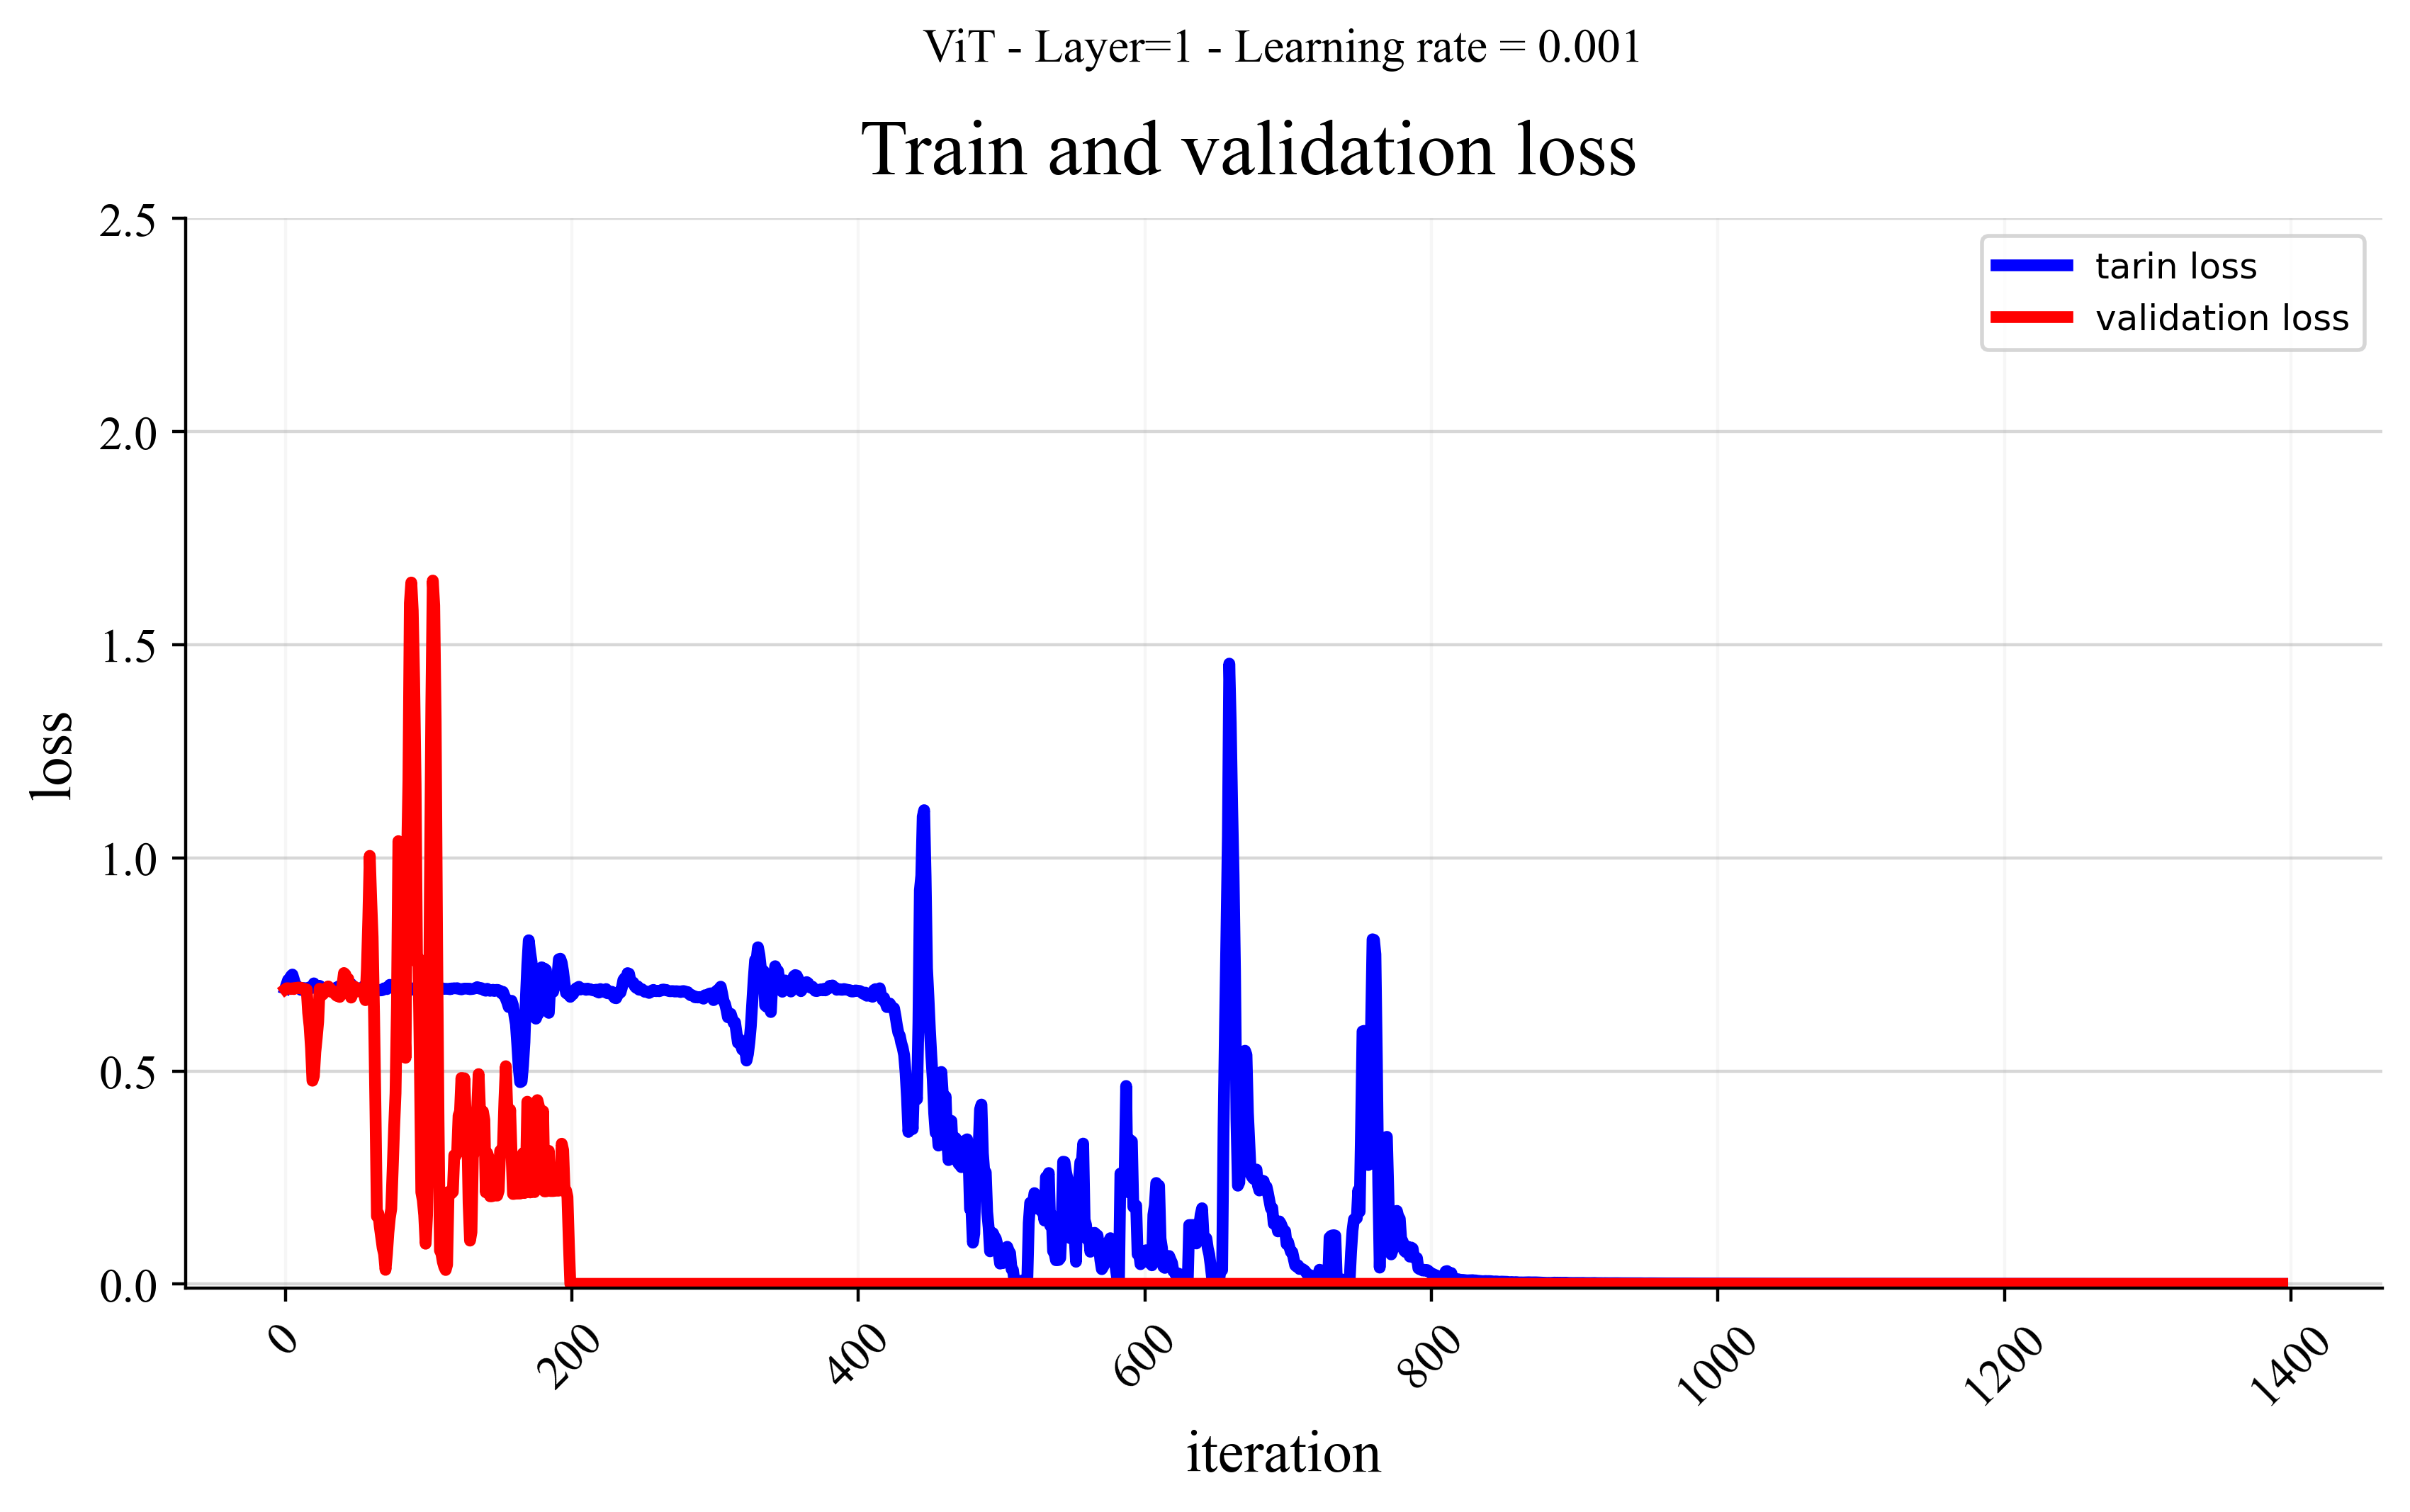

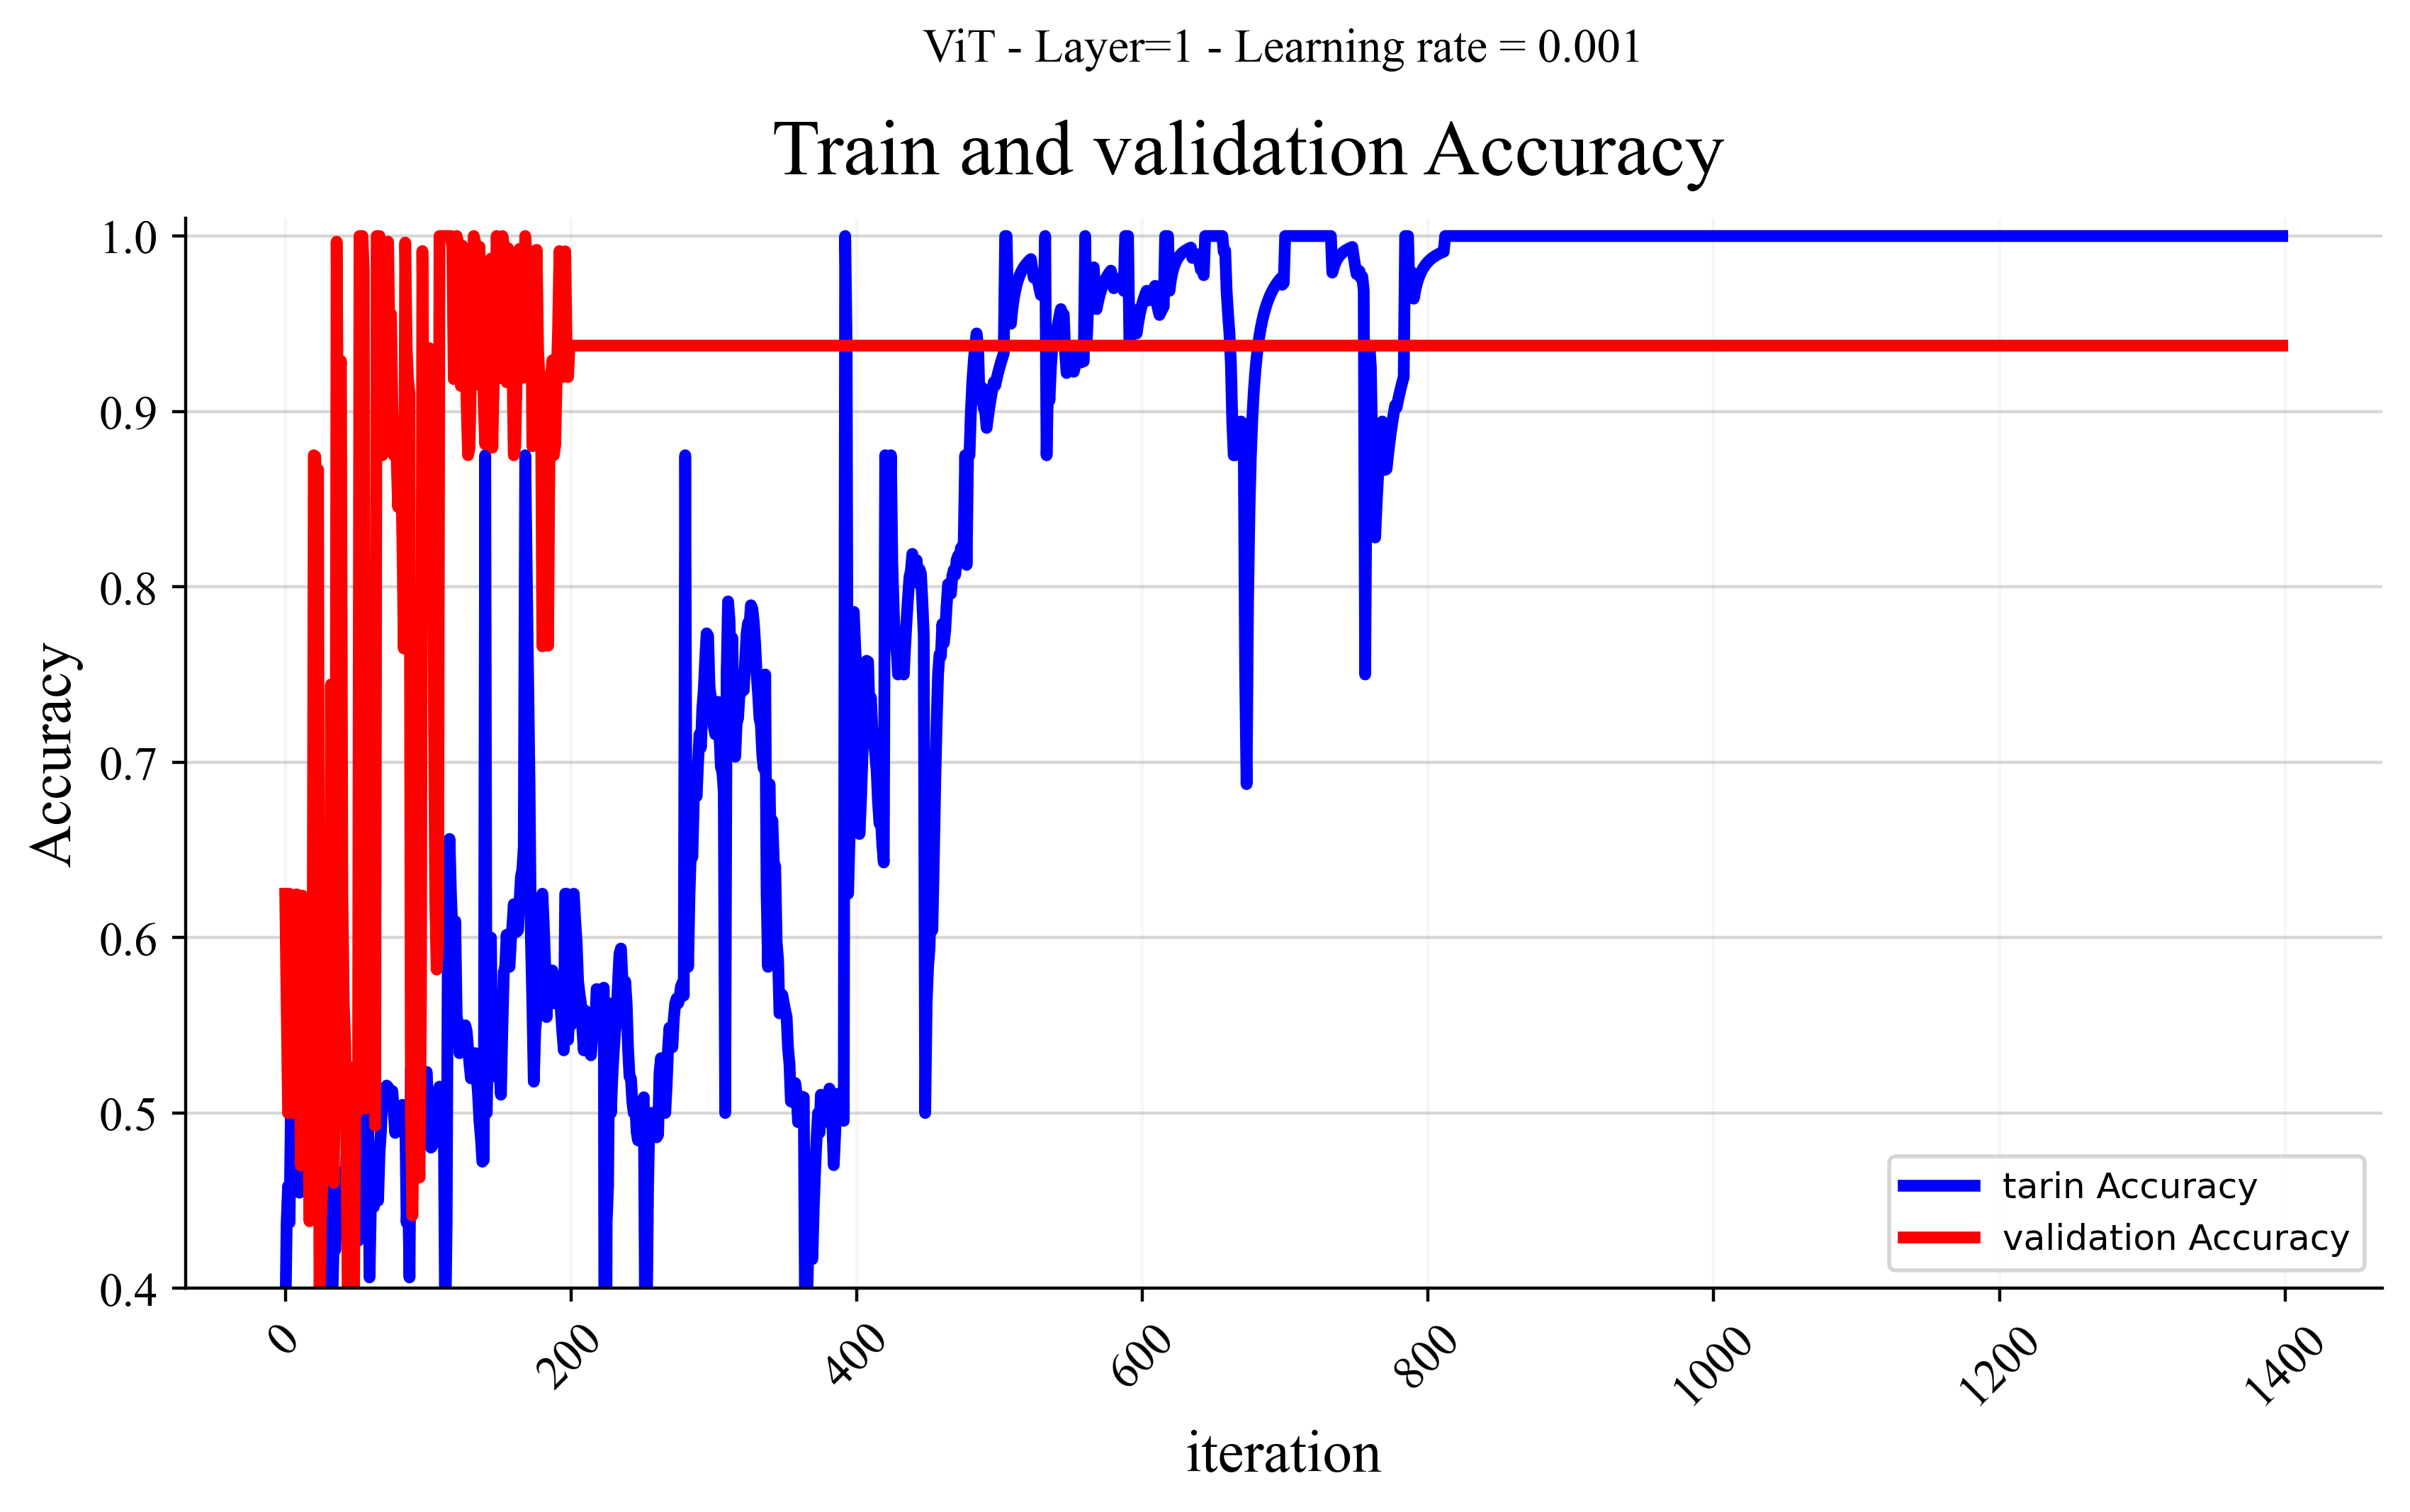

In [8]:
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

Model_name = 'ViT - Layer=1 - Learning rate = 0.001'
vvvvv = -1
utils.plot.result_plot(Model_name+"loss","loss",
                        moving_average(np.array(train['loss_batch'])[:vvvvv],5),
                        moving_average(Preprocc(test['loss_batch'],np.array(train['loss_batch']),)[:vvvvv],5),
                        title = Model_name,
                        DPI=400,
                        y_lim=[-.01,2.5])

utils.plot.result_plot(Model_name+"Accuracy","Accuracy",
                        np.array(train['avg_train_acc_till_current_batch'])[:vvvvv],
                        np.array(Preprocc(test['avg_val_acc_till_current_batch'],train['avg_train_acc_till_current_batch']),)[:vvvvv],
                        title = Model_name,
                        DPI=400,
                        y_lim=[0.4,1.01])

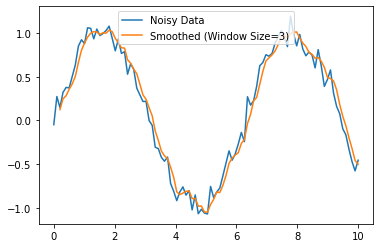

In [6]:
import numpy as np
import matplotlib.pyplot as plt



# Example usage:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)  # Simulated noisy data

window_size = 3
smoothed_y = moving_average(y, window_size)

plt.plot(x, y, label='Noisy Data')
plt.plot(x[window_size-1:], smoothed_y, label=f'Smoothed (Window Size={window_size})')
plt.legend()
plt.show()


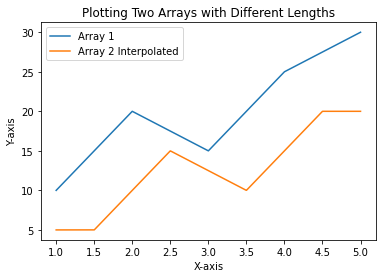

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x1 = np.array([1, 2, 3, 4, 5])
y1 = np.array([10, 20, 15, 25, 30])

x2 = np.array([1.5, 2.5, 3.5, 4.5])
y2 = np.array([5, 15, 10, 20])

# Interpolate the shorter array to match the length of the longer one
x_interp = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 1000)
y2_interp = np.interp(x_interp, x2, y2)

# Plot the data
plt.plot(x1, y1, label='Array 1')
plt.plot(x_interp, y2_interp, label='Array 2 Interpolated')

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting Two Arrays with Different Lengths')
plt.legend()

# Show the plot
plt.show()


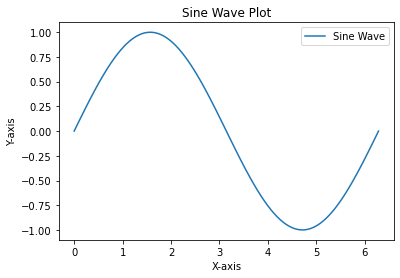

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create some sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a plot
plt.plot(x, y, label='Sine Wave')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sine Wave Plot')

# Add a legend
plt.legend()

# Save the plot as a vector PDF
plt.savefig('plot.pdf', format='pdf')

# Show the plot (optional)
plt.show()
